In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Set the aesthetic style of the plots to whitegrid
sns.set(style="whitegrid")

sk_data = load_breast_cancer()

In [128]:
# Create a DataFrame from the dataset features
df = pd.DataFrame(sk_data.data,
                  columns=sk_data.feature_names)

# Add the target variable to the DataFrame
df["target"] = sk_data.target

# Display the first 5 rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [129]:
# Check the dimensions of the DataFrame (rows, columns)
df.shape

(569, 31)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [131]:
# Check the distribution of the target variable
df["target"].value_counts()

,count
target,
1,357
0,212


In [132]:
# Check for any missing values in the entire DataFrame
df.isna().sum().sum()

np.int64(0)

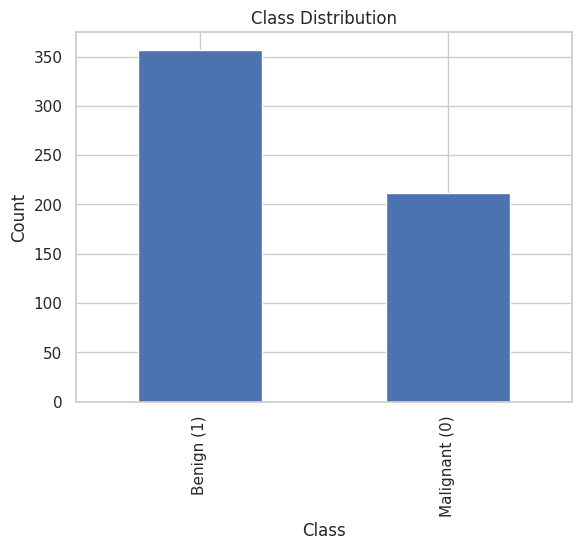

In [133]:
df["target"].value_counts().plot(kind="bar")
plt.xticks(ticks=[0, 1], labels=["Benign (1)", "Malignant (0)"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

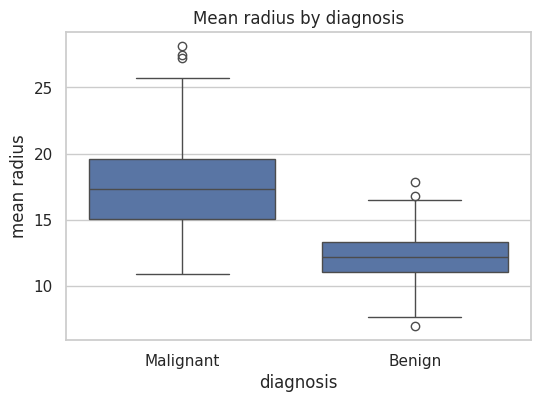

In [134]:
# Create a new feautre column called diagnosis by mapping target values (0/1)
df["diagnosis"] = df["target"].map({0: "Malignant", 1: "Benign"})

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="diagnosis", y="mean radius")
plt.title("Mean radius by diagnosis")
plt.show()


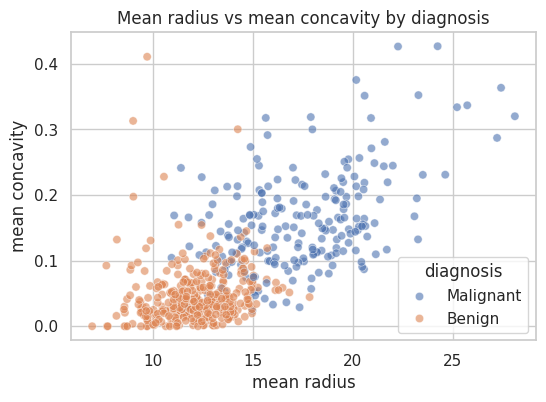

In [135]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="mean radius",
    y="mean concavity",
    hue="diagnosis",
    alpha=0.6
)
plt.title("Mean radius vs mean concavity by diagnosis")
plt.show()


In [136]:
# What we want to predict (0/1 or Malignant or Benign)
y = df["target"]

# Features: all 30 numeric features (exclude 'target' and 'diagnosis')
feature_cols = sk_data.feature_names  # already a list of feature names
X = df[feature_cols]


In [137]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,       # preserve class balance in train/valid
    random_state=42
)

# Display the shapes of the training and validation feature sets
X_train.shape, X_valid.shape

((455, 30), (114, 30))

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic Regression pipeline
logreg_pipe = Pipeline(
    steps=[
        ("scale", StandardScaler()),
        ("model", LogisticRegression(max_iter=500, solver="lbfgs"))
    ]
)

# Random Forest pipeline
rf_pipe = Pipeline(
    steps=[
        ("scale", StandardScaler()),
        ("model", RandomForestClassifier(
            n_estimators=200,
            random_state=42
        ))
    ]
)


In [139]:
# Fit the Logistic Regression model to the training data
logreg_pipe.fit(X_train, y_train)
# Fit the Random Forest model to the training data
rf_pipe.fit(X_train, y_train)

# Predict class labels for the validation set using Logistic Regression
y_pred_logreg = logreg_pipe.predict(X_valid)
# Predict probabilities for class 1 (benign) for the validation set
# using Logistic Regression
y_proba_logreg = logreg_pipe.predict_proba(X_valid)[:, 1]

# Predict class labels for the validation set using Random Forest
y_pred_rf = rf_pipe.predict(X_valid)
# Predict probabilities for class 1 (benign) for the validation set
# using Random Forest
y_proba_rf = rf_pipe.predict_proba(X_valid)[:, 1]

In [140]:
# Accuracy
acc_logreg = accuracy_score(y_valid, y_pred_logreg)
acc_rf = accuracy_score(y_valid, y_pred_rf)

# ROC AUC (using probability for class 1)
auc_logreg = roc_auc_score(y_valid, y_proba_logreg)
auc_rf = roc_auc_score(y_valid, y_proba_rf)

print("Logistic Regression - Accuracy:", acc_logreg, "ROC AUC:", auc_logreg)
print("Random Forest       - Accuracy:", acc_rf, "ROC AUC:", auc_rf)


Logistic Regression - Accuracy: 0.9824561403508771 ROC AUC: 0.9953703703703703
Random Forest       - Accuracy: 0.956140350877193 ROC AUC: 0.9932208994708995


In [141]:
print("Logistic Regression report:")
print(classification_report(y_valid, y_pred_logreg,
                            target_names=["Malignant", "Benign"]))

print("Random Forest report:")
print(classification_report(y_valid, y_pred_rf,
                            target_names=["Malignant", "Benign"]))


Logistic Regression report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest report:
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [142]:
# Extract the trained RandomForest model from the pipeline
rf_model = rf_pipe.named_steps["model"]

importances = rf_model.feature_importances_

# Sort features by importance
feat_importances = pd.Series(importances,
                             index=feature_cols).sort_values(ascending=False)
feat_importances.head(10)


,0
worst perimeter,0.133100
worst area,0.128052
worst concave points,0.108107
mean concave points,0.094414
worst radius,0.090639
mean radius,0.058662
mean perimeter,0.055242
mean area,0.049938
mean concavity,0.046207
worst concavity,0.035357


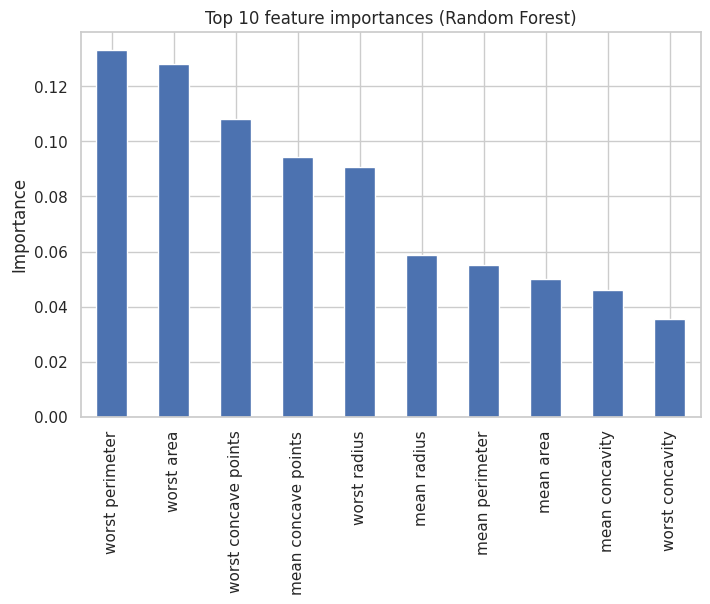

In [143]:
plt.figure(figsize=(8,5))
feat_importances.head(10).plot(kind="bar")
plt.title("Top 10 feature importances (Random Forest)")
plt.ylabel("Importance")
plt.show()
